## Nethack integration

Trying to integrate nethack with our genetic algorithm.

Generate new environment:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rules_new import RuleNew, initial_population, print_rule, make_rule_good
from fitness_new import FitnessCalculator, movement_score, proximity_score, find_distance_grid, get_population_fitness
from genetic_new import genetic_algorithm
from utility_func import *
import time

In [2]:
import gym
import minihack

In [3]:
LABYRINTH = True

if not LABYRINTH:

    env=gym.make(
        "MiniHack-Room-Random-15x15-v0",
        observation_keys=("chars", "colors", "specials", "pixel"),
    )

else:

    env = gym.make("MiniHack-MazeWalk-Mapped-15x15-v0", observation_keys=("chars", "colors", "specials", "pixel"))


env.seed(17)
obs = env.reset() #Generate a new environment and save the describtions arrays in obs
env.render() #Print the room 


## Get the submatrix of the env

agent_position = search_environment_agent_position(obs["chars"])
goal_position = search_environment_goal_position(obs["chars"])

print(agent_position)
print(goal_position)
env_indexes = search_environment_indexes(obs["chars"])

## Produce a best rule based on that submatrix 

visualize_environment = {32: ' ', #empy space
                        35: '#', #wall
                        46: '.', #floor
                        62: '>', #door
                        64: '@', #player
                            }


# collect the printed room in a matrix
room = []

for row in obs["chars"]:
    room.append([visualize_environment[char] for char in row])






You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                ..... ... ...                                   
                                .   . .   . >                                   
                                ... ... ... .                                   
                                . . .   .   .                                   
                                . . . ... ...                                   
                                  .   .   .                                     
                           

# Visualize the environment

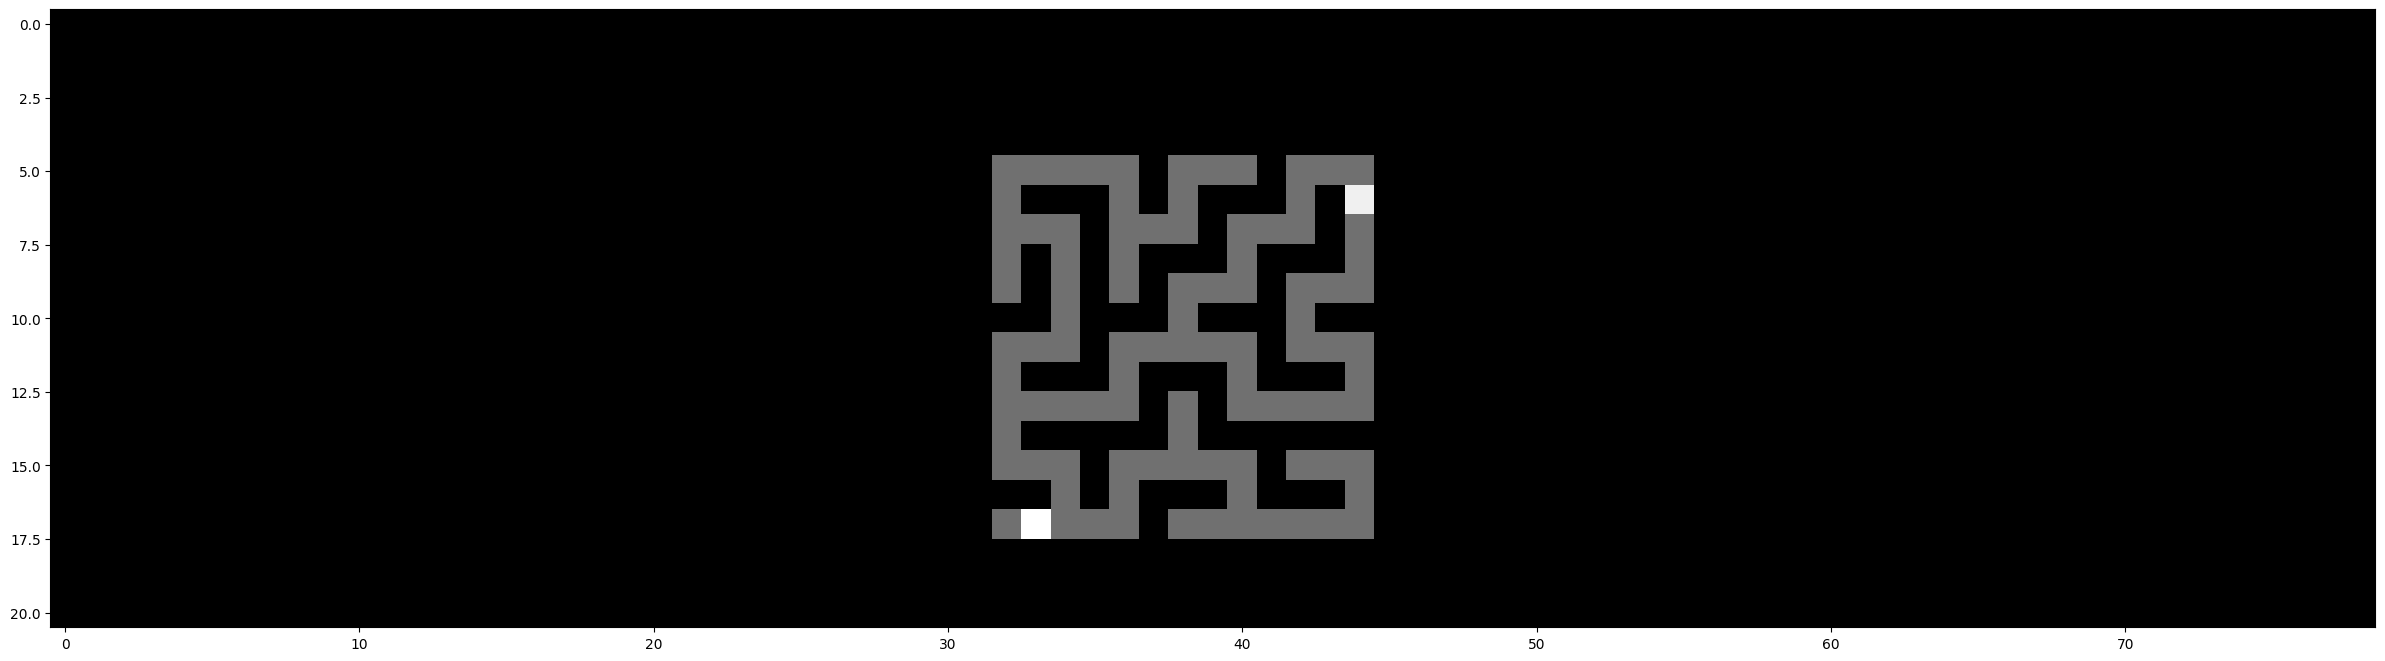

In [4]:
def env_visualize(obs):
    
    fig, ax = plt.subplots()
    im = ax.imshow(obs["chars"], cmap='gray')

    #adjust the size of the figure
    fig.set_size_inches(30,10)


env_visualize(obs)

## Apply genetic algorithm to find the best solution

In [5]:
initial_pop = initial_population(200)
for rule in initial_pop:
    make_rule_good(rule)
# Some shenanigans to make the code work

goal = goal_position[0] - 3, goal_position[1] - 32
agent = agent_position = agent_position[0] - 3, agent_position[1] - 32

print(agent)
print(goal)



(14, 1)
(3, 12)


In [6]:
distance_grid = find_distance_grid(*goal)
print(distance_grid)

[[12 11 10  9  8  7  6  5  4  3  3  3  3  3  3]
 [12 11 10  9  8  7  6  5  4  3  2  2  2  2  2]
 [12 11 10  9  8  7  6  5  4  3  2  1  1  1  2]
 [12 11 10  9  8  7  6  5  4  3  2  1  0  1  2]
 [12 11 10  9  8  7  6  5  4  3  2  1  1  1  2]
 [12 11 10  9  8  7  6  5  4  3  2  2  2  2  2]
 [12 11 10  9  8  7  6  5  4  3  3  3  3  3  3]
 [12 11 10  9  8  7  6  5  4  4  4  4  4  4  4]
 [12 11 10  9  8  7  6  5  5  5  5  5  5  5  5]
 [12 11 10  9  8  7  6  6  6  6  6  6  6  6  6]
 [12 11 10  9  8  7  7  7  7  7  7  7  7  7  7]
 [12 11 10  9  8  8  8  8  8  8  8  8  8  8  8]
 [12 11 10  9  9  9  9  9  9  9  9  9  9  9  9]
 [12 11 10 10 10 10 10 10 10 10 10 10 10 10 10]
 [12 11 11 11 11 11 11 11 11 11 11 11 11 11 11]]


In [7]:
proximity_score = lambda distance: 1/np.sqrt(distance)
fitness_calculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

fitness_list = get_population_fitness(initial_pop, fitness_calculator)
fitness_list = np.array(fitness_list)
print(np.sum(fitness_list))

134.00139569498938


In [8]:
fitness_list = fitness_list - np.min(fitness_list)

# parallelize code of genetic algorithm 

new_population, new_fitness, sum_fitnesses = genetic_algorithm(distance_grid=distance_grid,
                                                population=initial_pop,
                                                fitness_calculator=fitness_calculator,
                                                fitness_list=fitness_list,
                                                chance_for_mutation=0,
                                                n_iterations=300,
                                                n_rules=100)


100%|██████████| 300/300 [01:32<00:00,  3.25it/s]

[ 231.0653397   431.68365629  658.22243994  856.96841433 1040.07696548
 1198.63830927 1339.71995363 1437.74197223 1590.98490257 1804.05894038
 1884.61489738 2035.52384837 2112.17695248 2261.83340008 2361.46746396
 2524.5199609  2632.818448   2713.79275523 2837.51089903 2937.28528417
 3073.9089005  3107.744163   3141.89032575 3191.16304146 3238.75907887
 3371.2505544  3420.68227159 3480.66668667 3503.93049479 3502.85597539
 3577.3876977  3568.82985383 3644.05217933 3667.89185836 3754.90634949
 3743.8656068  3726.11358668 3854.21304243 3887.14460296 3940.83691796
 3951.61332983 3938.28016449 3951.92958726 4001.99737557 4035.56143317
 4049.28925087 4083.40039953 4101.42042879 4172.11086273 4232.54612655
 4280.80985439 4332.75186652 4375.39700703 4396.95157087 4440.6664913
 4466.17896402 4518.60830057 4578.09249852 4653.91003766 4623.41932478
 4609.32673685 4559.93851624 4628.92781306 4646.64527462 4677.91147986
 4626.45378899 4653.17184852 4695.98434599 4685.44612764 4674.13625245
 4714.0

In [9]:
new_fitness=np.array(new_fitness)
ind = np.argmax(new_fitness)
best_rule = new_population[ind]

→ → ↓ ↘ ↘ ↘ → ↘ ↓ ↘ ↓ ↓ ↓ ↘ ↙ 
→ ↘ → ↑ ↗ ↘ ↘ ↗ → ↑ ↘ ↘ ↓ ↓ ↓ 
→ ↗ ← ↓ → ↘ ↗ ↗ ↘ → ↓ ↘ ↓ ↙ ↙ 
↘ ↖ → → ← → ↓ → ↙ → ↑ → ↑ ← ↑ 
↗ ↘ ↑ ↘ → → ↗ → ↗ ↑ ↗ ↗ ← ← ← 
↘ ↗ ↗ ↑ → ↘ ↗ ↖ ↘ ↗ ↗ ↑ ↑ ↖ ↑ 
↗ → ↗ ↖ ↑ ← ↗ ↘ ↑ → → ↖ ↗ ↗ ↑ 
→ ↓ ↑ → → → ← → ↘ ↗ ↑ ↗ ↖ ↑ ↖ 
→ ↑ ↗ → ↘ ↓ ↘ ↗ ↗ ↖ ← ↗ ← ↗ ↖ 
↗ → ↑ ← → ↘ ↗ ↗ ↗ ↑ ↗ ↗ ↖ → ← 
↗ ↗ ↑ ↘ ↗ ↗ ↗ ↗ ← ↖ ↑ ↘ ↗ ↑ ↖ 
↘ ← ↘ → → ↗ ↖ ← ↑ ↓ ↑ ← ← ← ↑ 
↘ ↗ → ↑ ↑ ↓ ↑ ↑ ↗ ↑ ↖ ← ↖ ↗ ← 
→ ↓ → ↗ ← ↑ ↖ ↗ ↑ ↙ ↑ ↑ ↖ ↑ ↖ 
→ → → ↖ ↗ ↑ ↗ ↑ ↗ ↑ ↖ ← ↑ → ↑ 


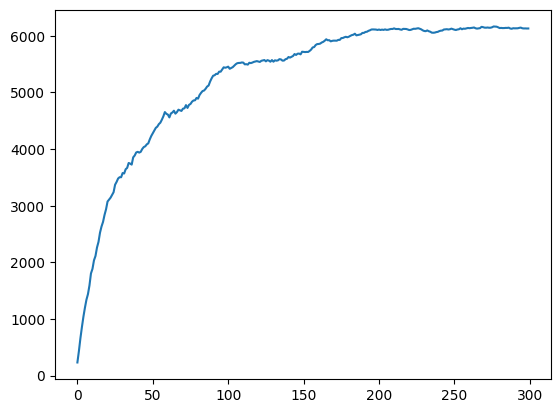

In [10]:
plt.plot(sum_fitnesses)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from fitness_new import *

FitnessCalculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

# A matrix containing the directions of the arrows to the objective

# Get the fitness matrix
score_matrix = FitnessCalculator.fitness_matrix(best_rule)

print(score_matrix)


# Replace this with your actual matrix of scores
# For demonstration purposes, let's create a random matrix
matrix_of_scores = score_matrix 

[[ 0.28867513  0.30151134  0.          0.33333333  0.35355339  0.37796447
   0.40824829  0.4472136   0.          0.57735027  0.57735027  0.57735027
   0.57735027  0.57735027  0.57735027]
 [ 0.28867513  0.30151134  0.31622777  0.          0.35355339  0.37796447
   0.40824829  0.4472136   0.5         0.          0.70710678  0.70710678
   0.70710678  0.70710678  0.        ]
 [ 0.28867513  0.30151134 -0.31622777  0.          0.35355339  0.37796447
   0.40824829  0.4472136   0.5         0.57735027  0.          1.
   1.          1.          0.70710678]
 [ 0.28867513 -0.30151134  0.31622777  0.33333333 -0.35355339  0.37796447
   0.          0.4472136  -0.5         0.57735027  0.          1.
   0.          1.          0.        ]
 [ 0.28867513  0.30151134  0.          0.33333333  0.35355339  0.37796447
   0.40824829  0.4472136   0.5         0.          0.70710678  1.
   0.          0.          0.70710678]
 [ 0.28867513  0.30151134  0.31622777  0.          0.35355339  0.37796447
   0.40824829 -

## Colormap

goal


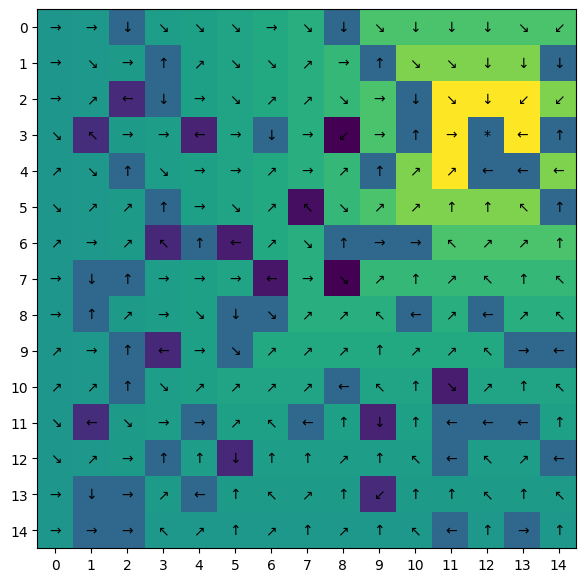

In [12]:
arrow_dictionary = {
    0 : "\u2191",
    1 : "\u2192",
    2 : "\u2193",
    3 : "\u2190",
    4 : "\u2197",
    5 : "\u2198",
    6 : "\u2199",
    7 : "\u2196",
}

# Replace these with your actual matrices and alphanumeric arrow values
matrix_of_scores = score_matrix
arrows_list = []

# Fill with all the right movements from print_rule(best_rule)
for i in range(15):
    for j in range(15):
        arrows_list.append(arrow_dictionary[best_rule.rules_grid[i][j]])

fig, ax = plt.subplots()
im = ax.imshow(matrix_of_scores)


#adjust the size of the figure
fig.set_size_inches(12, 7)

ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

for i in range(15):
    for j in range(15):
        if (i, j) == goal:
            print("goal")
            ax.annotate("*", xy=(j, i), ha='center', va='center', color='black')
        else:
            ax.annotate(arrows_list[i*15 + j], xy=(j, i), ha='center', va='center', color='black')


In [13]:
from rules_new import *
env.seed(17)
obs=env.reset()
env.render()
agent_position = search_environment_agent_position(obs["chars"])
agent = agent_position = agent_position[0] - 3, agent_position[1] - 32


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                ..... ... ...                                   
                                .   . .   . >                                   
                                ... ... ... .                                   
                                . . .   .   .                                   
                                . . . ... ...                                   
                                  .   .   .                                     
                           

Goal position: (3, 12)
Agent position: (14, 1)
Agent moved

                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                ..... ... ...                                   
                                .   . .   . >                                   
                                ... ... ... .                                   
                                . . .   .   .                                   
                                . . . ... ...                                   
                                  .   .   .      

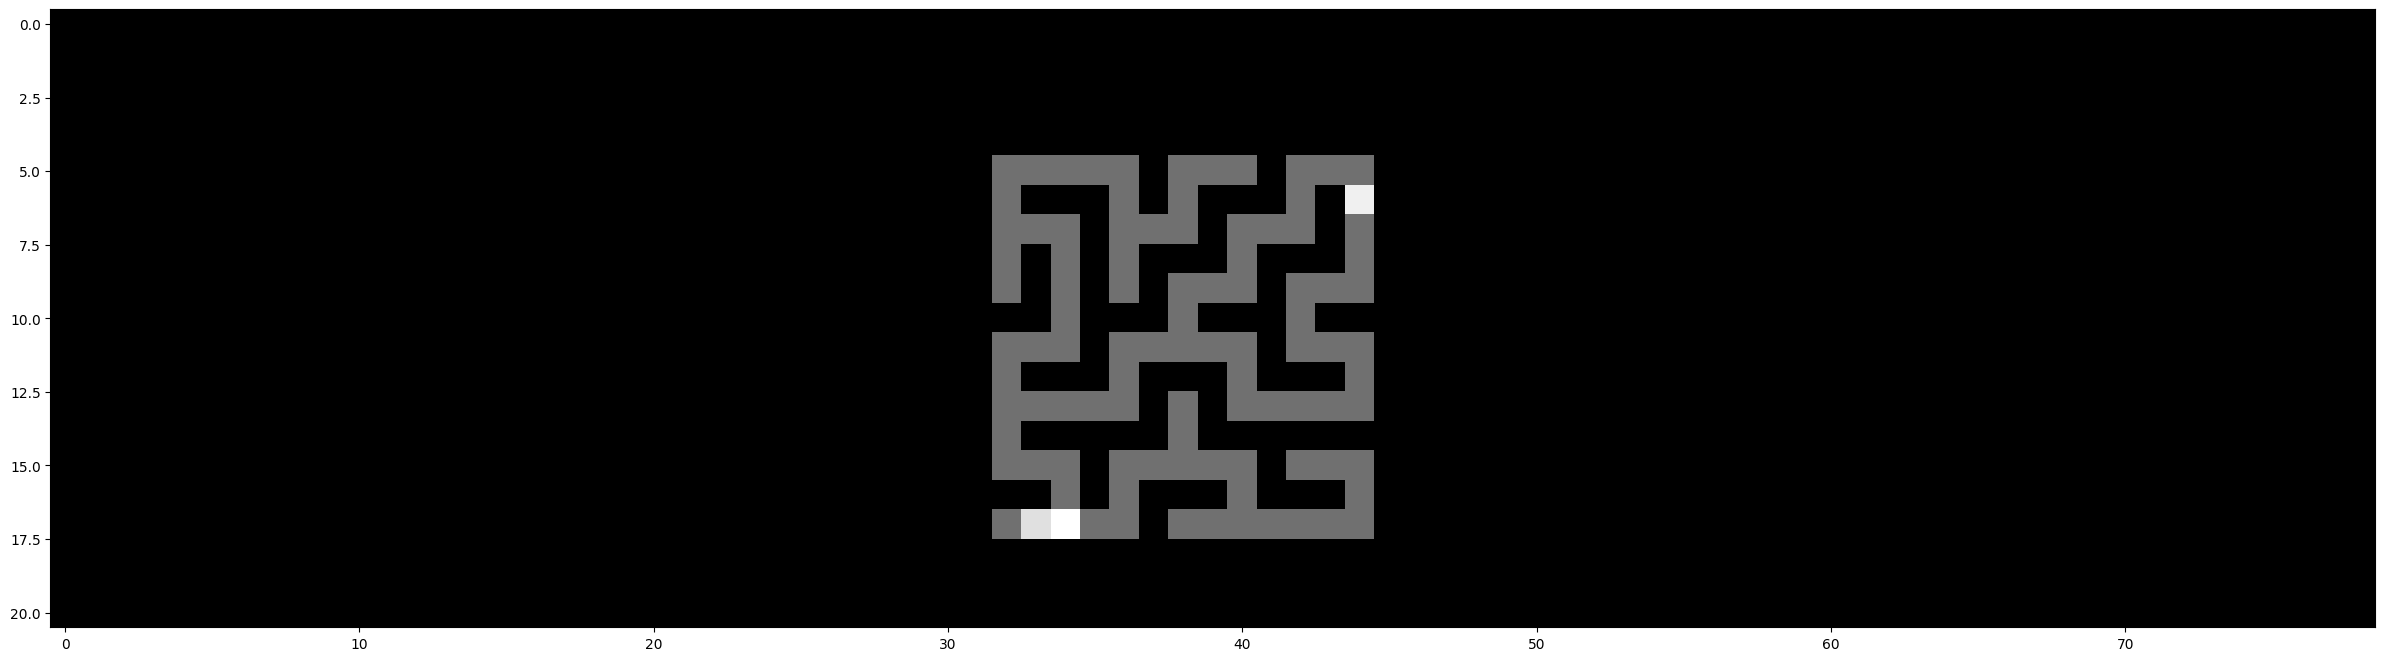

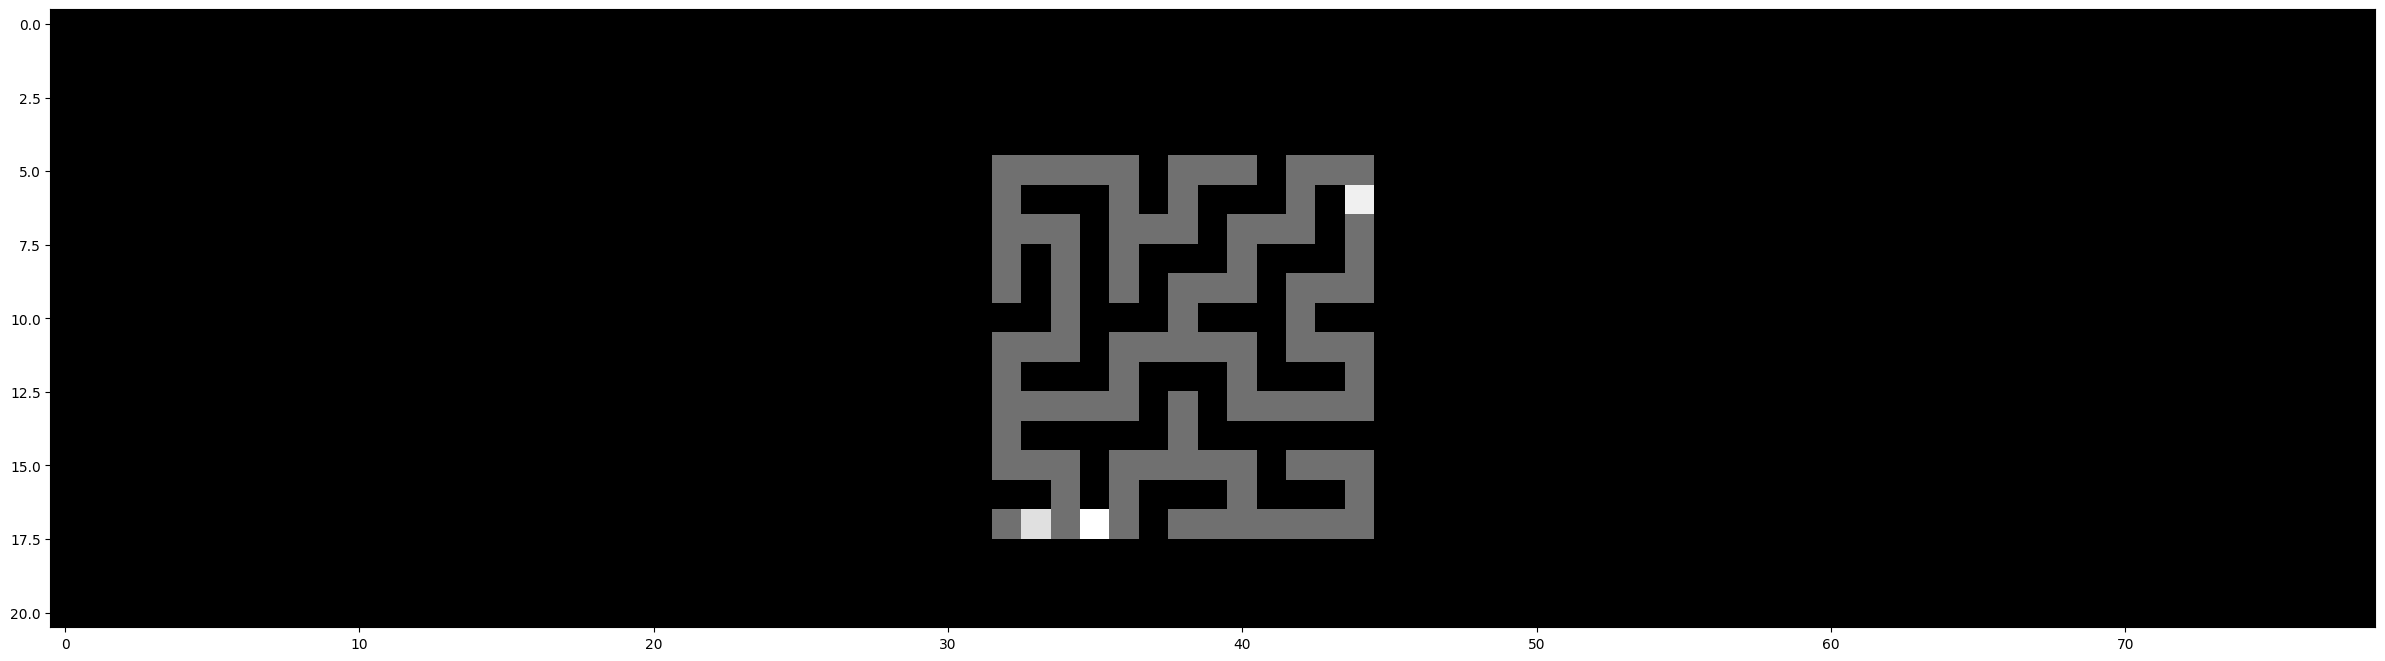

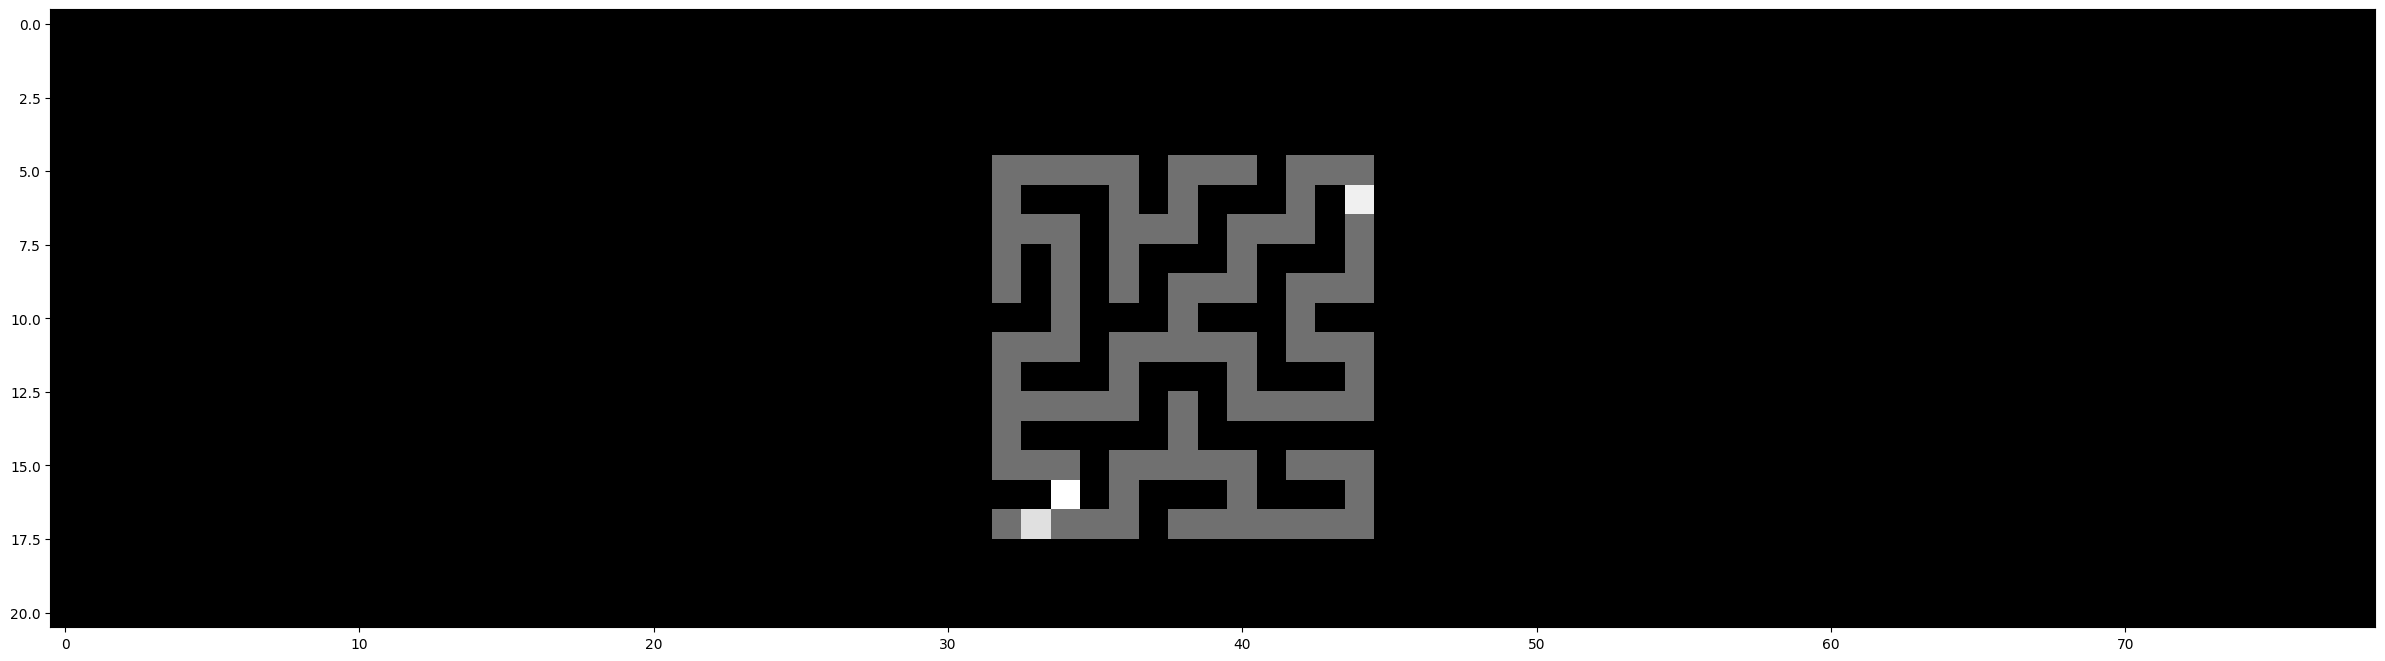

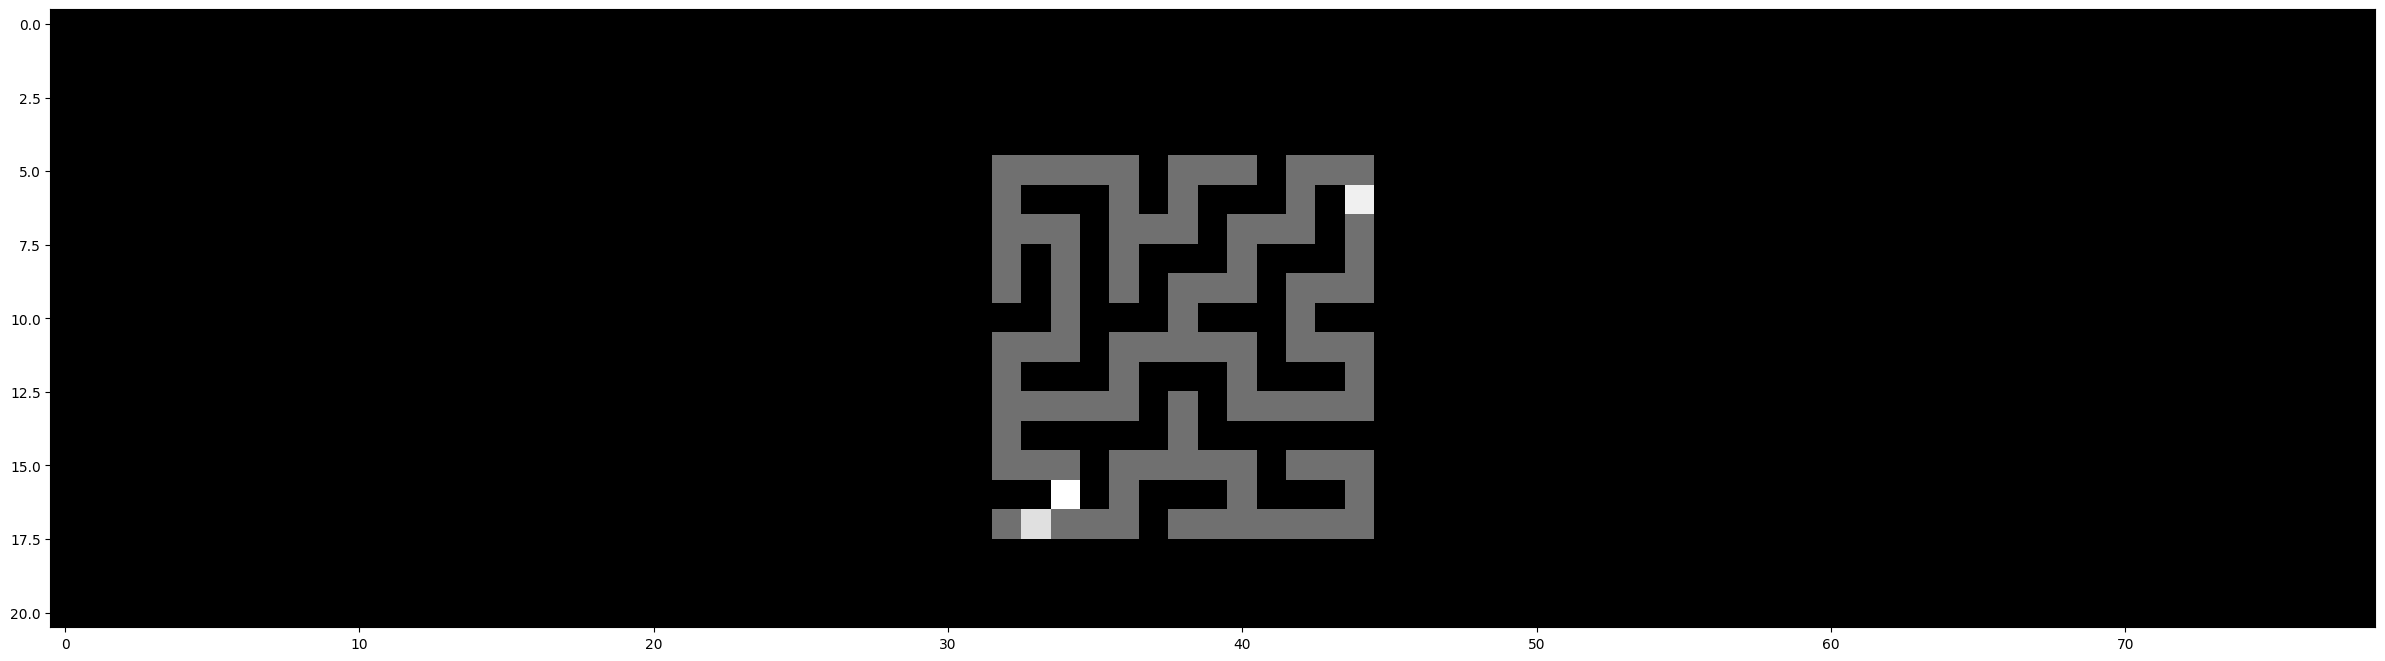

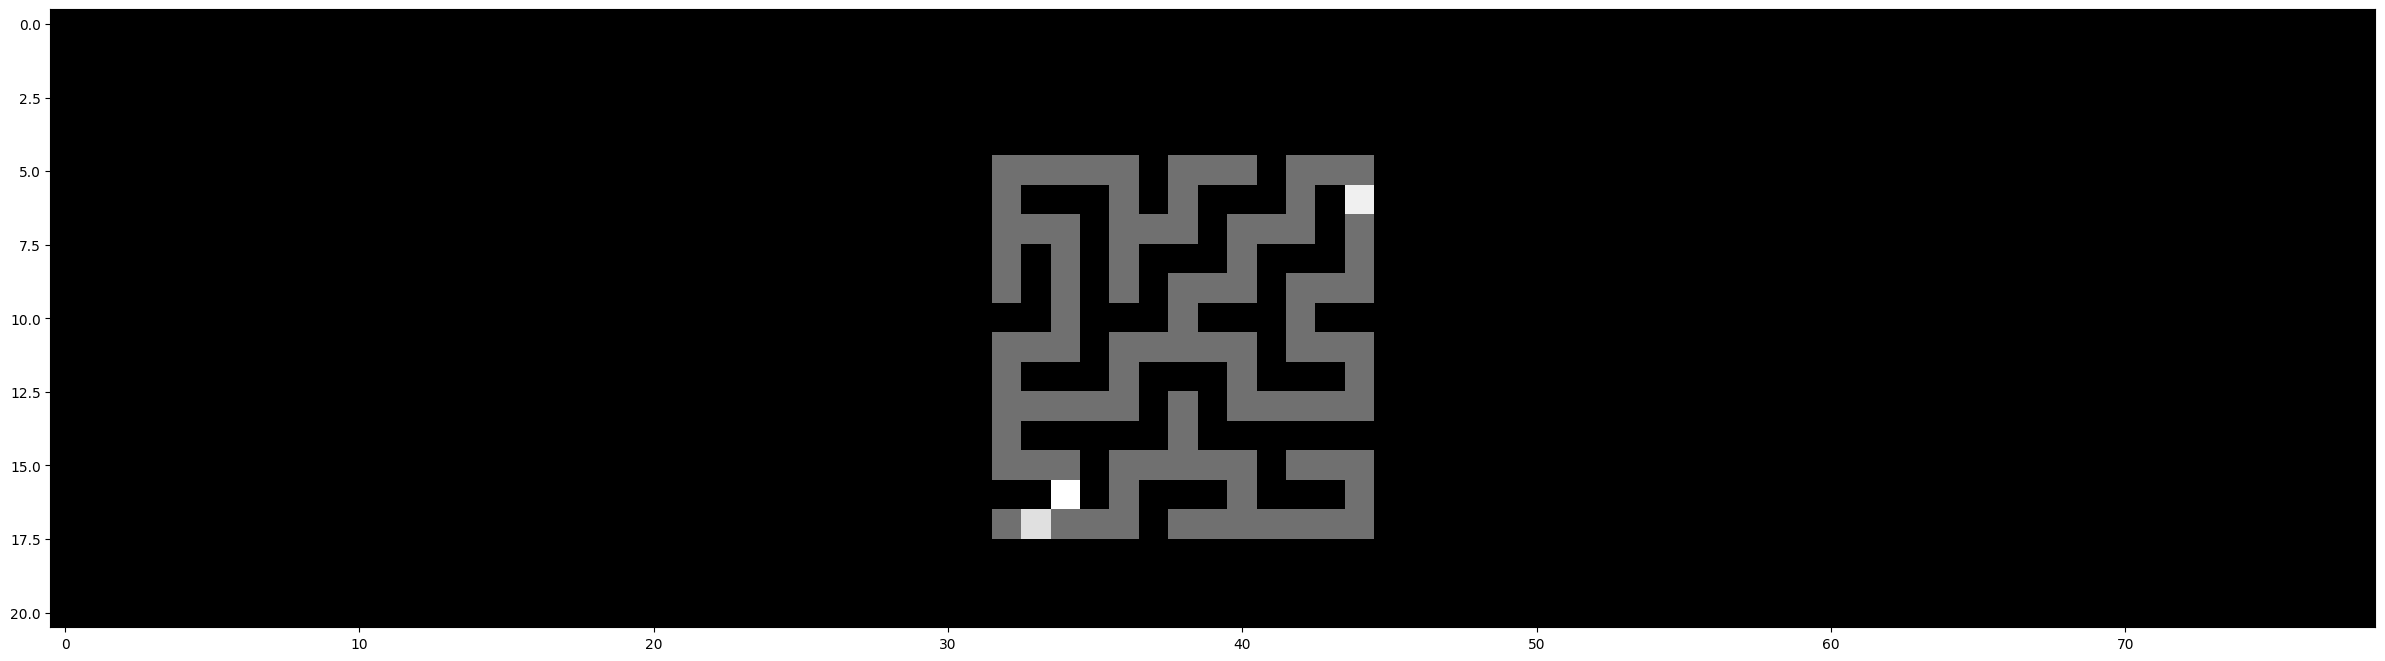

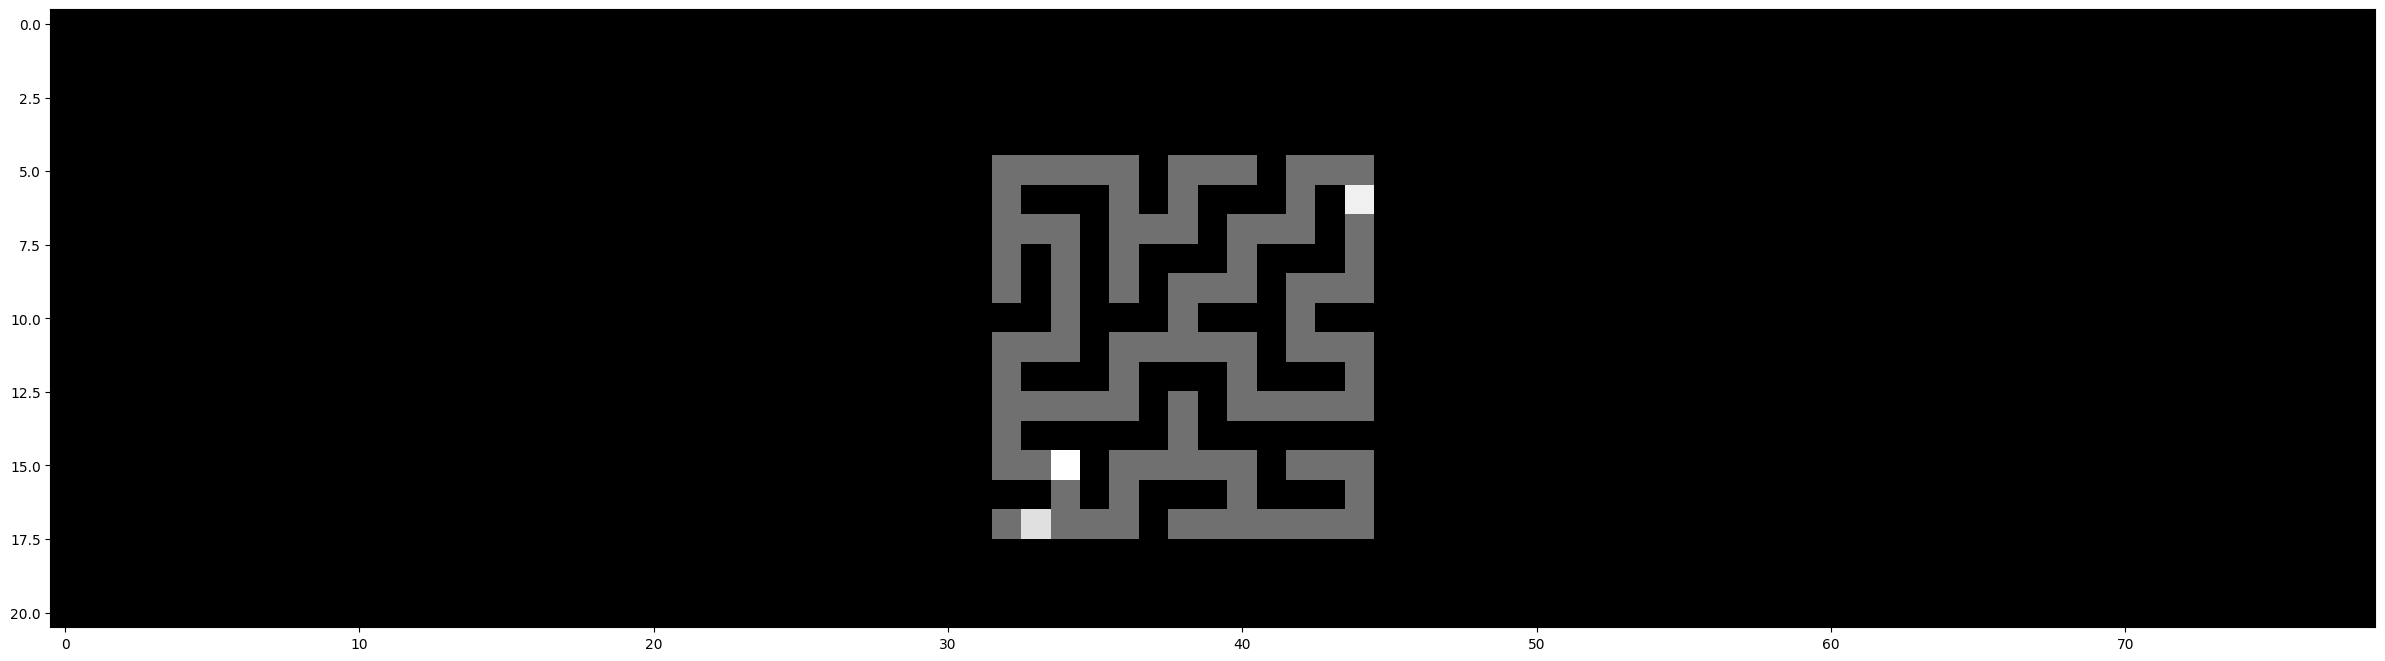

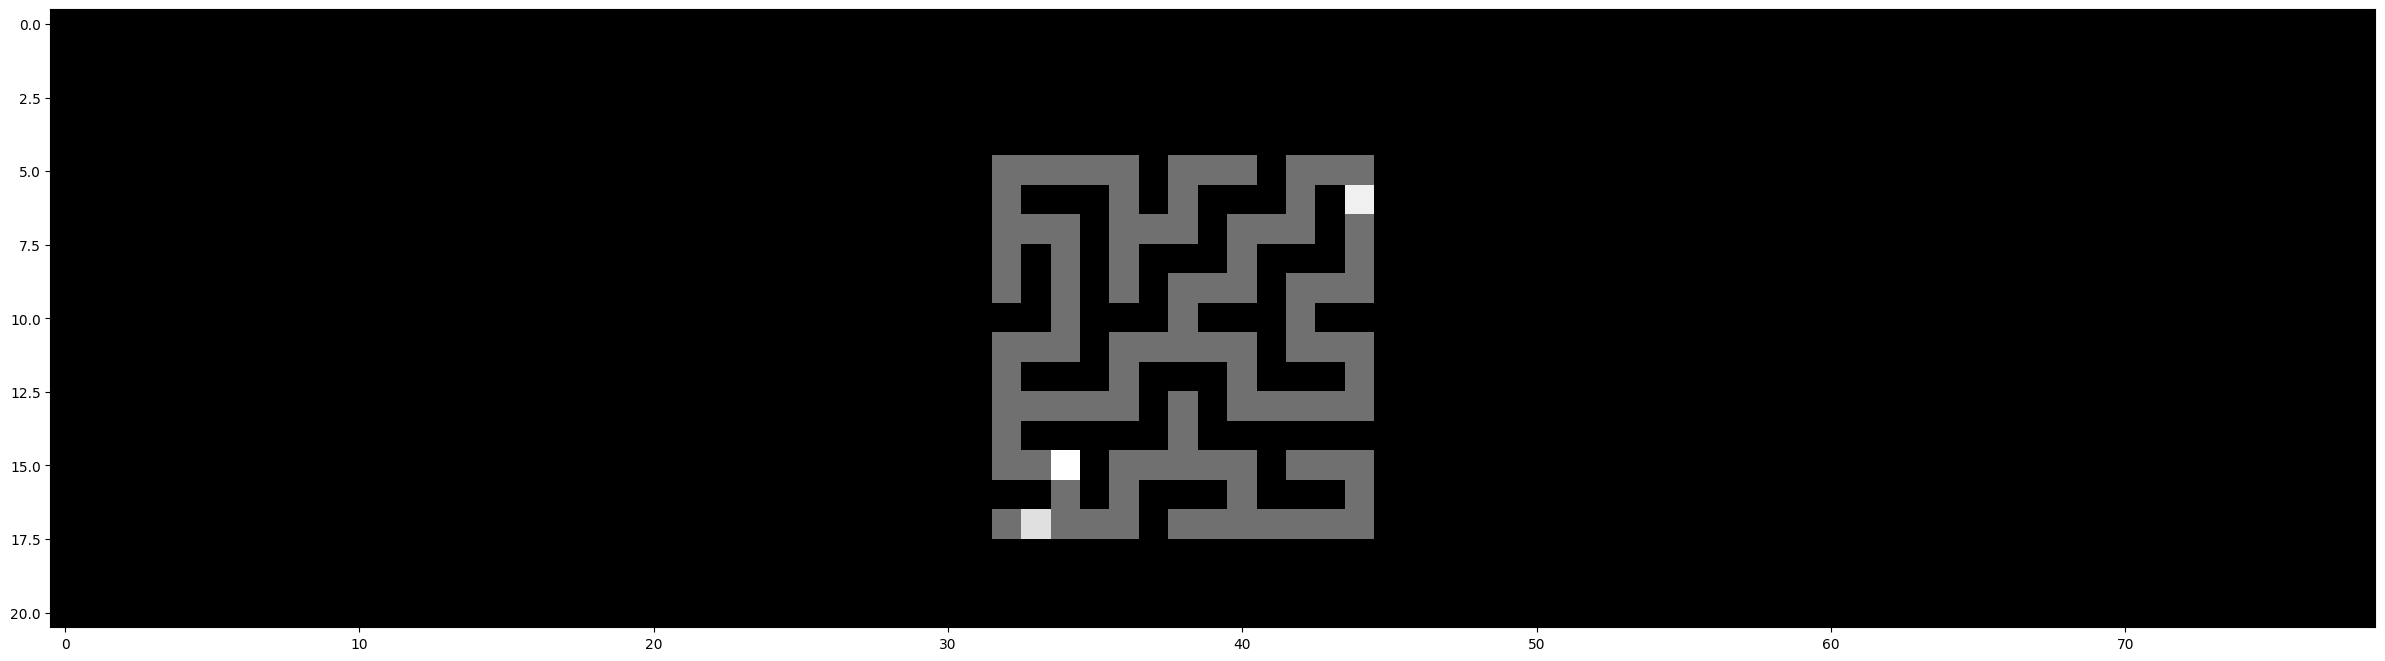

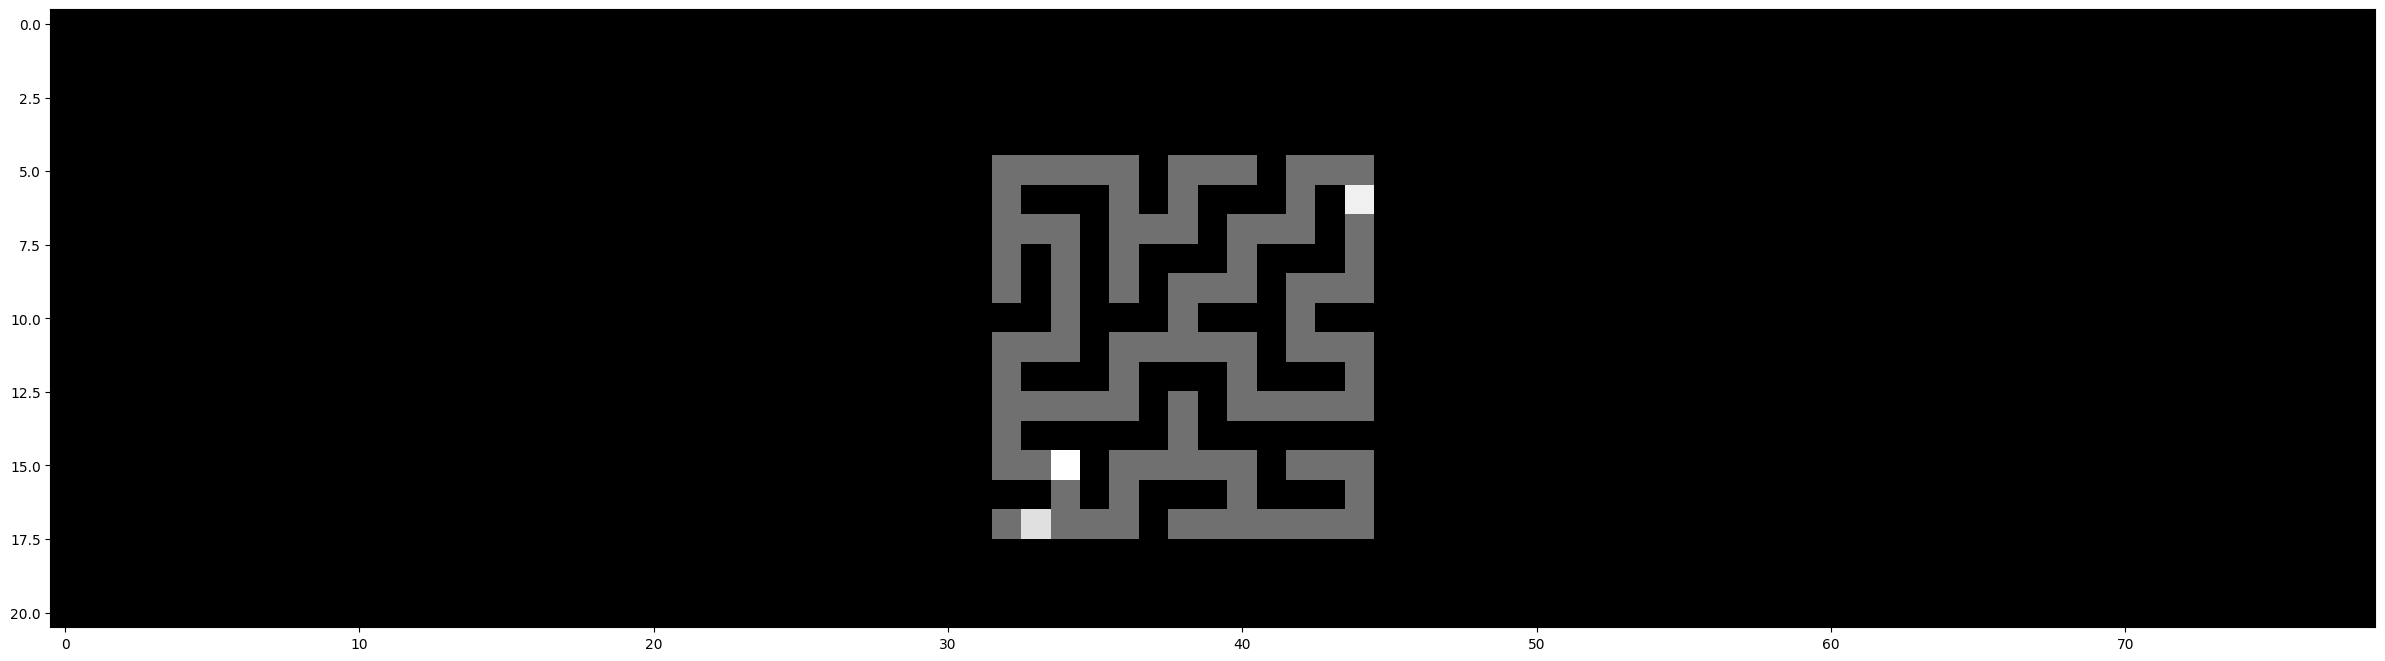

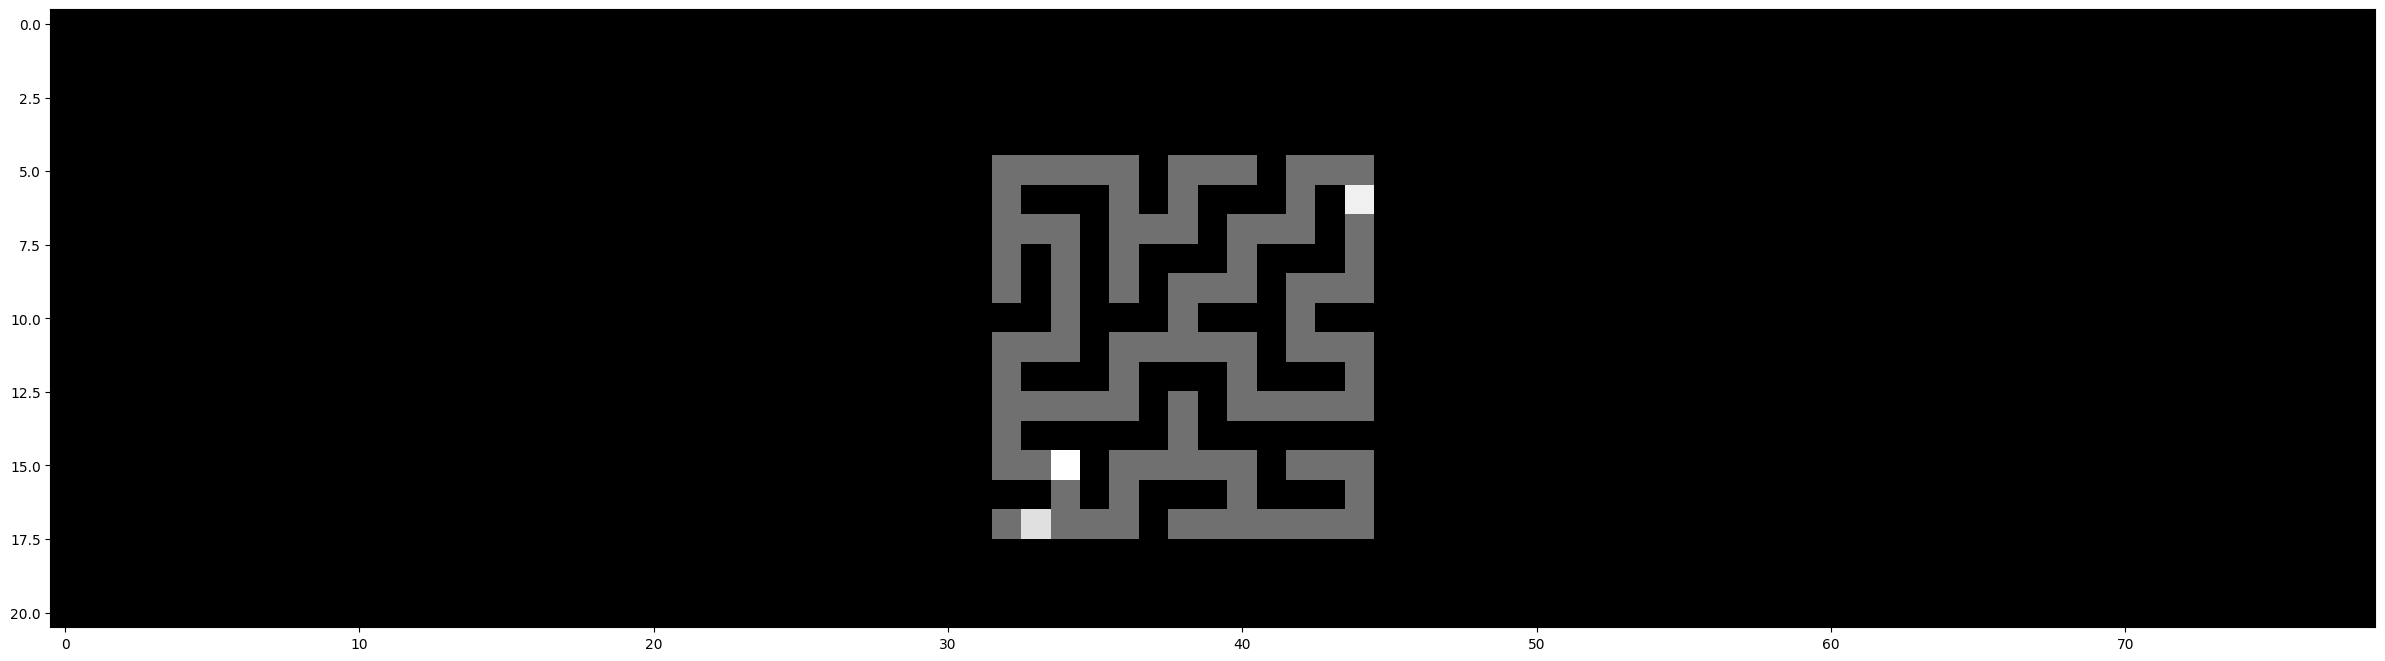

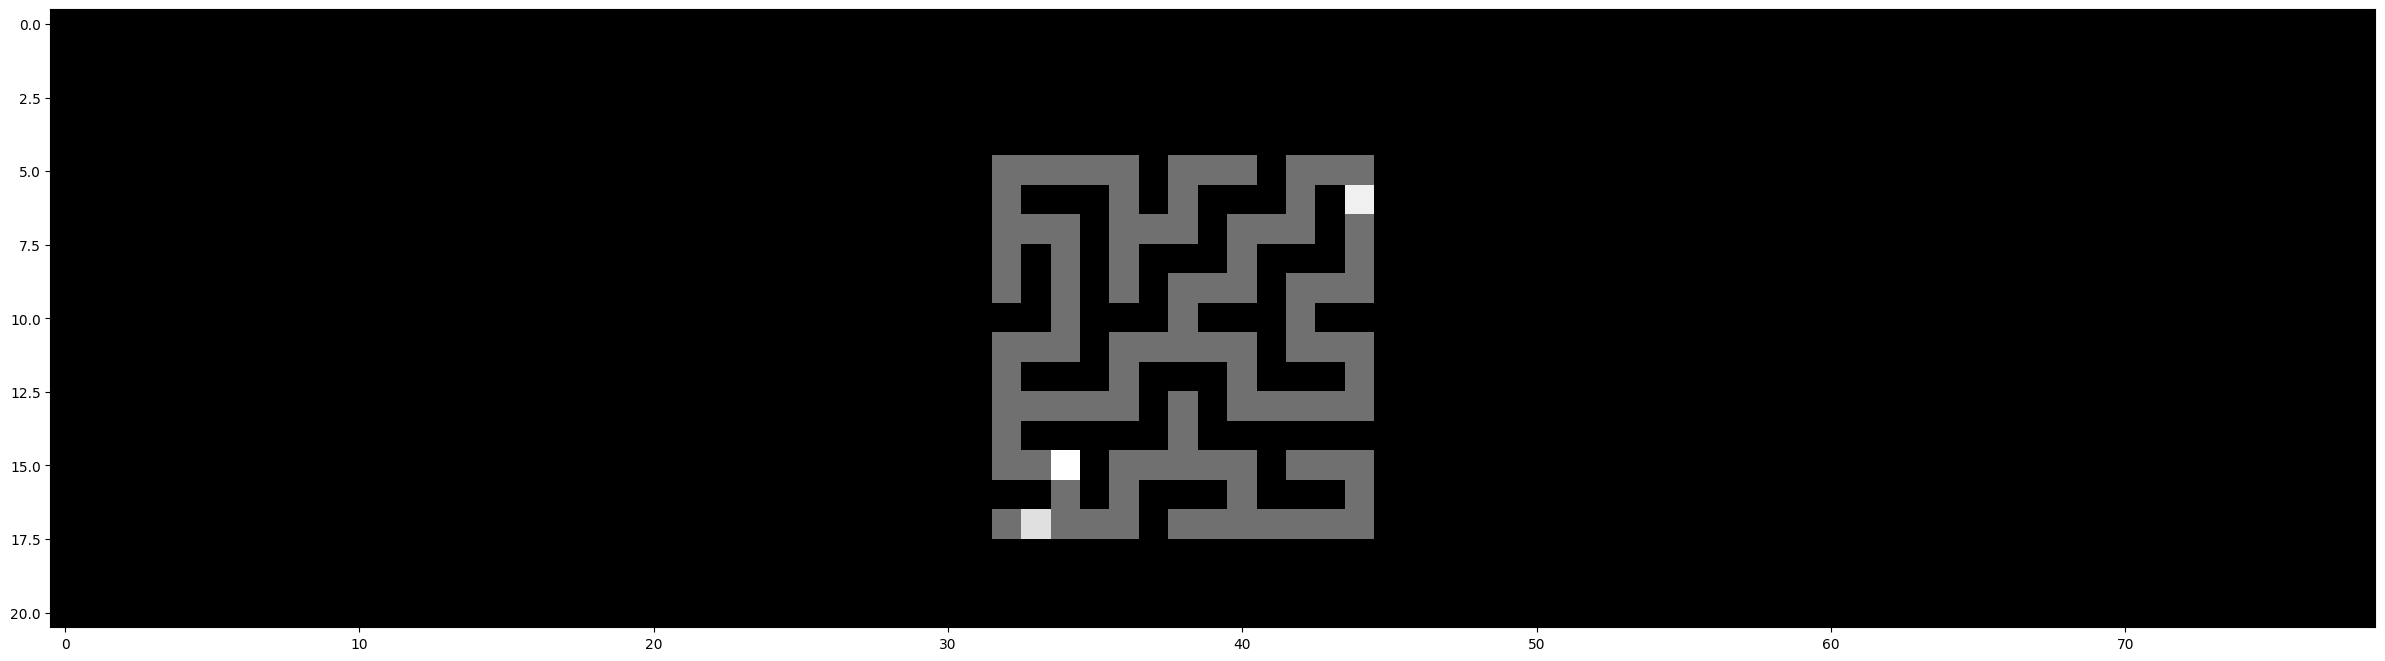

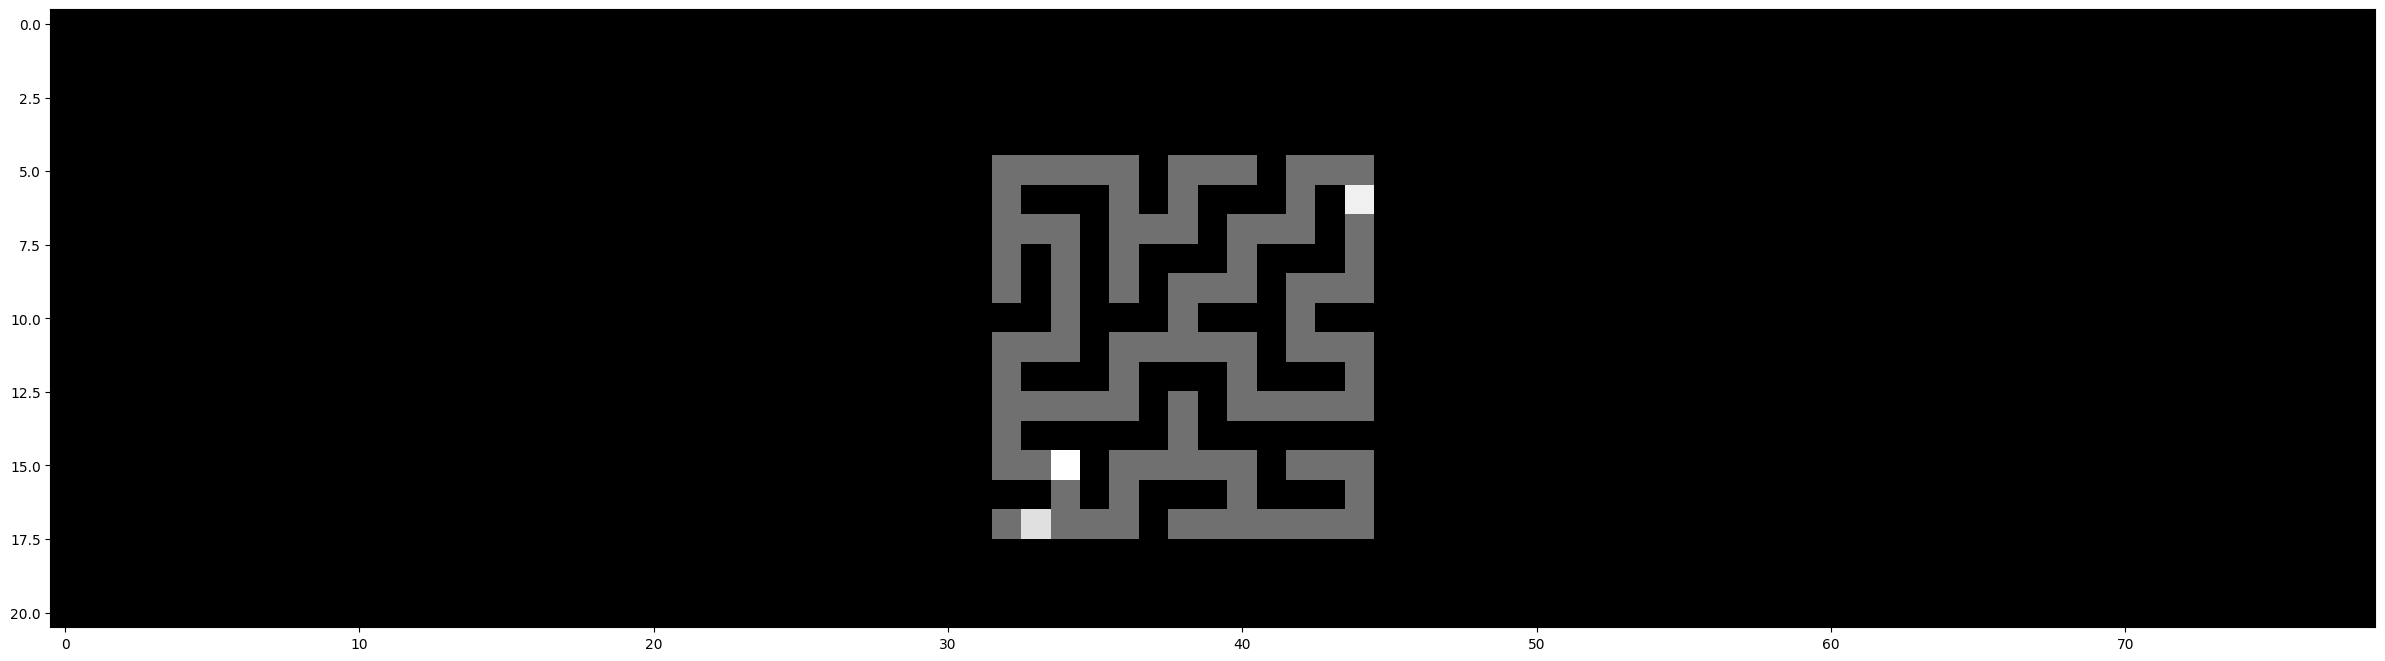

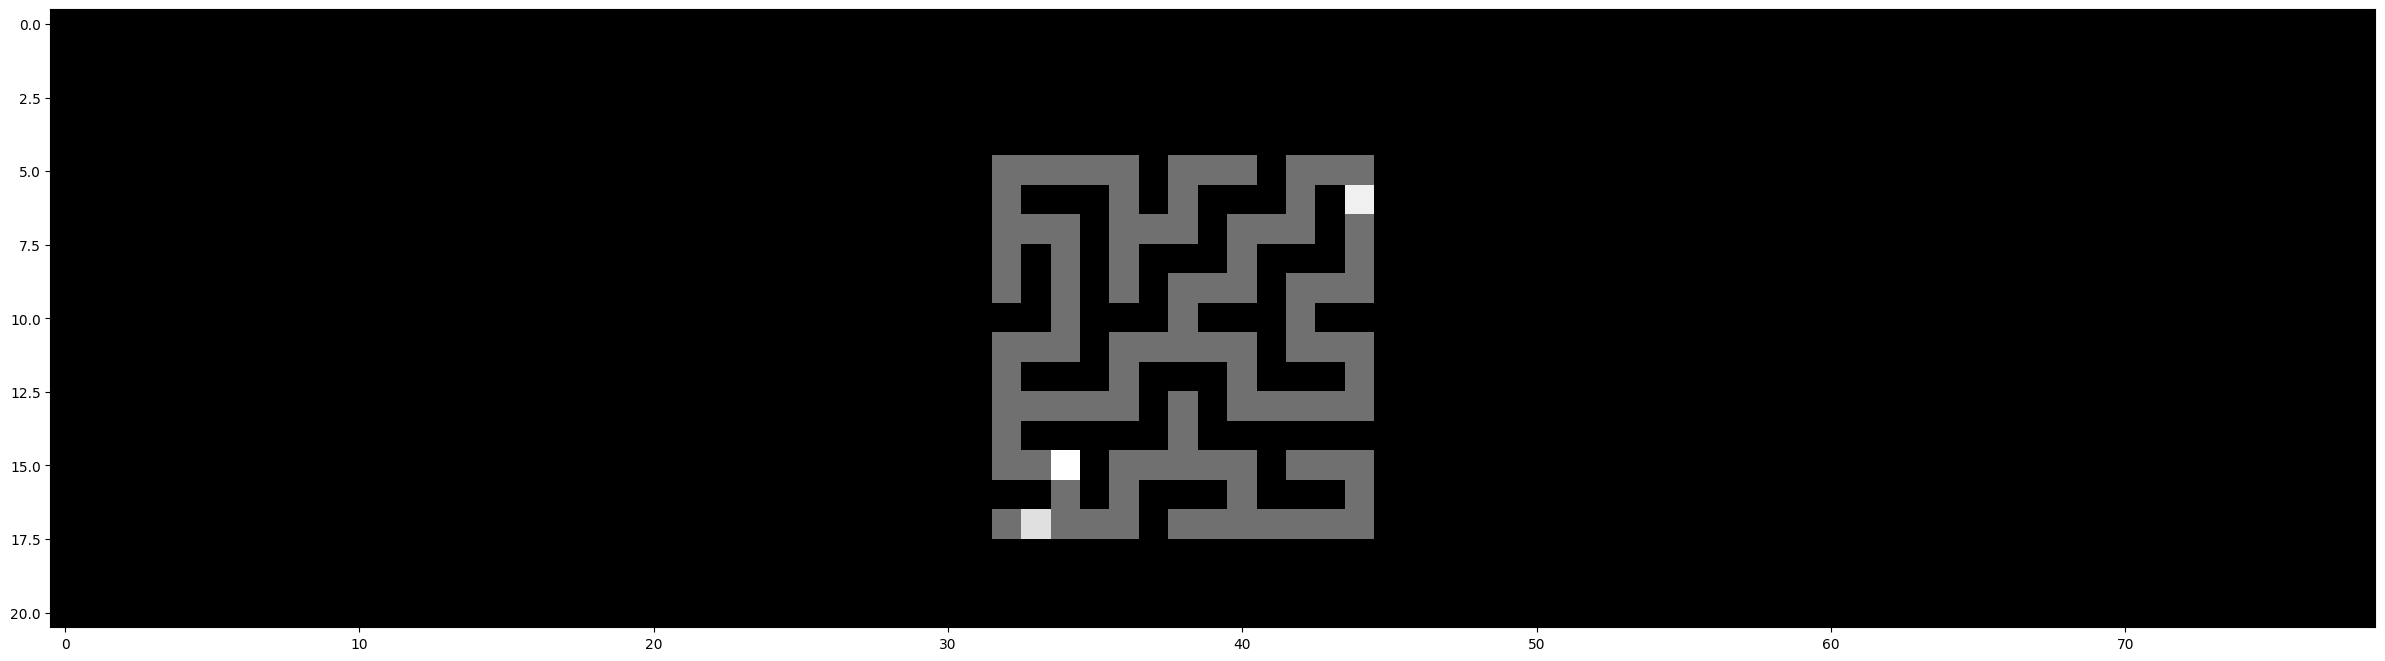

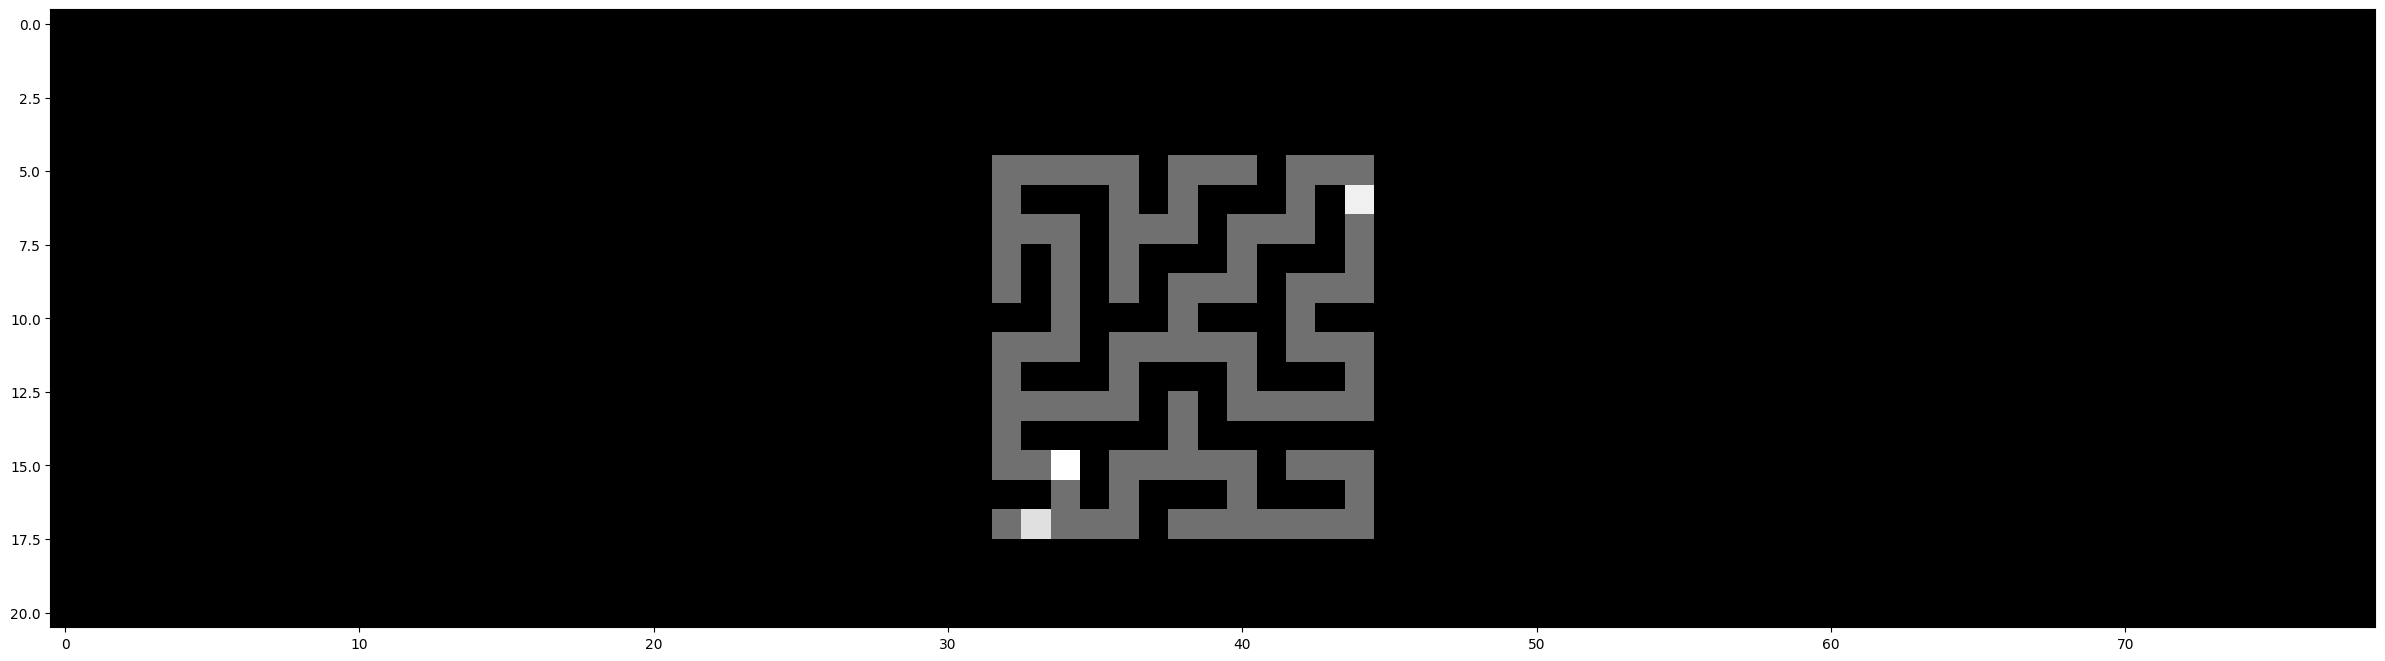

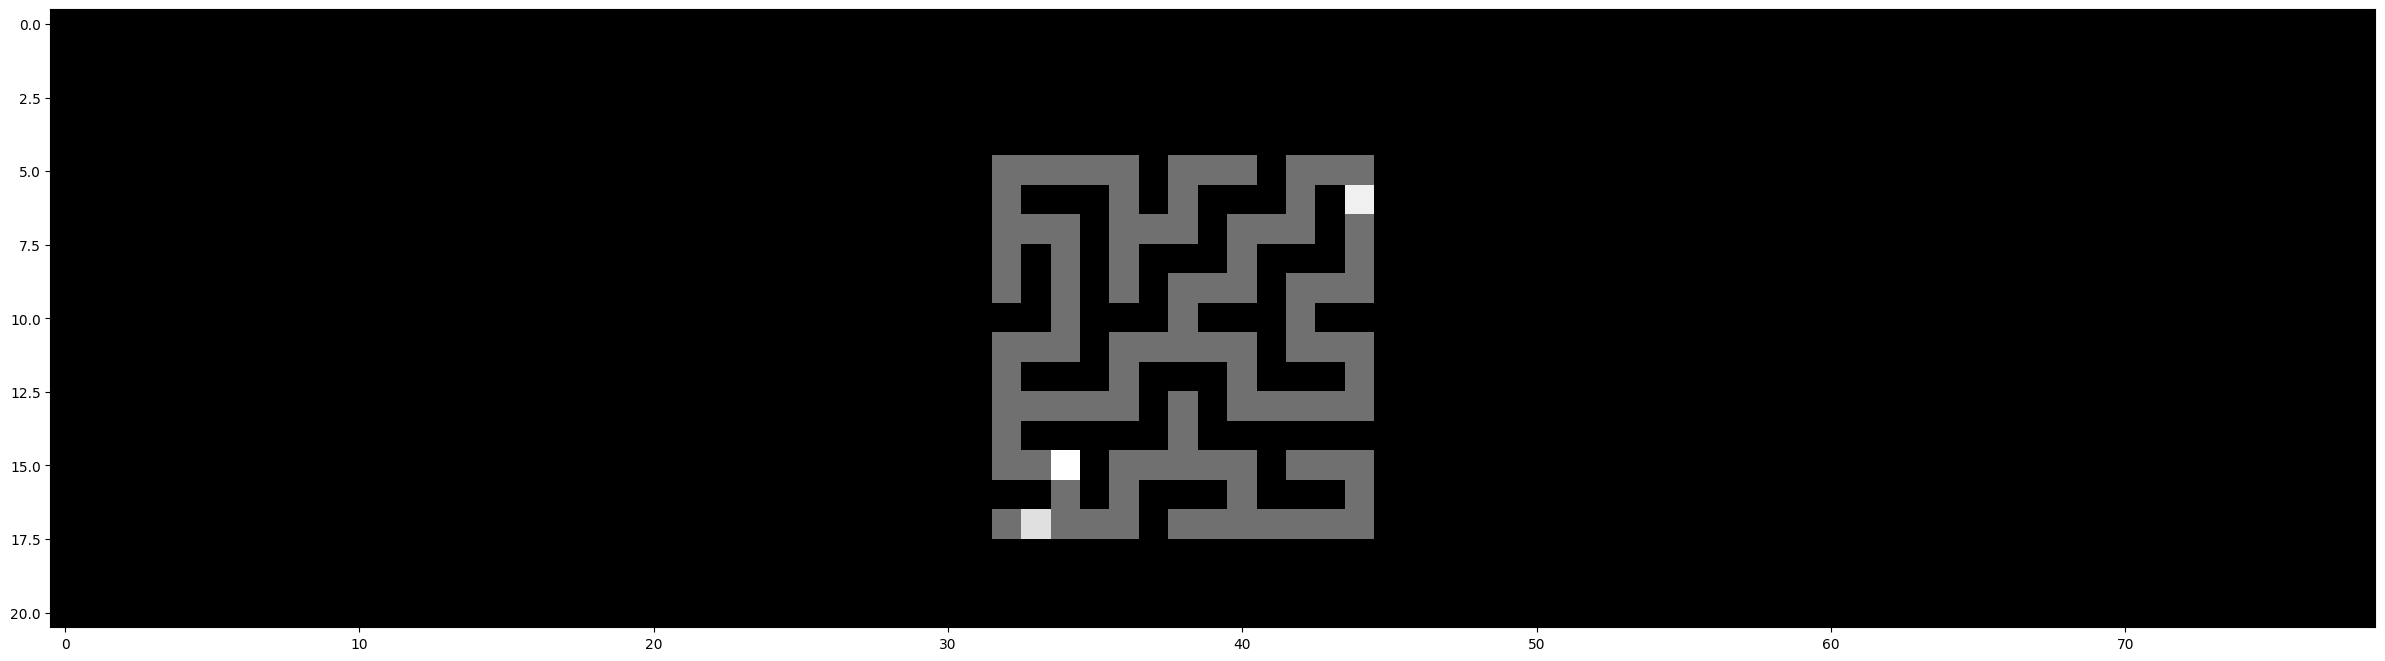

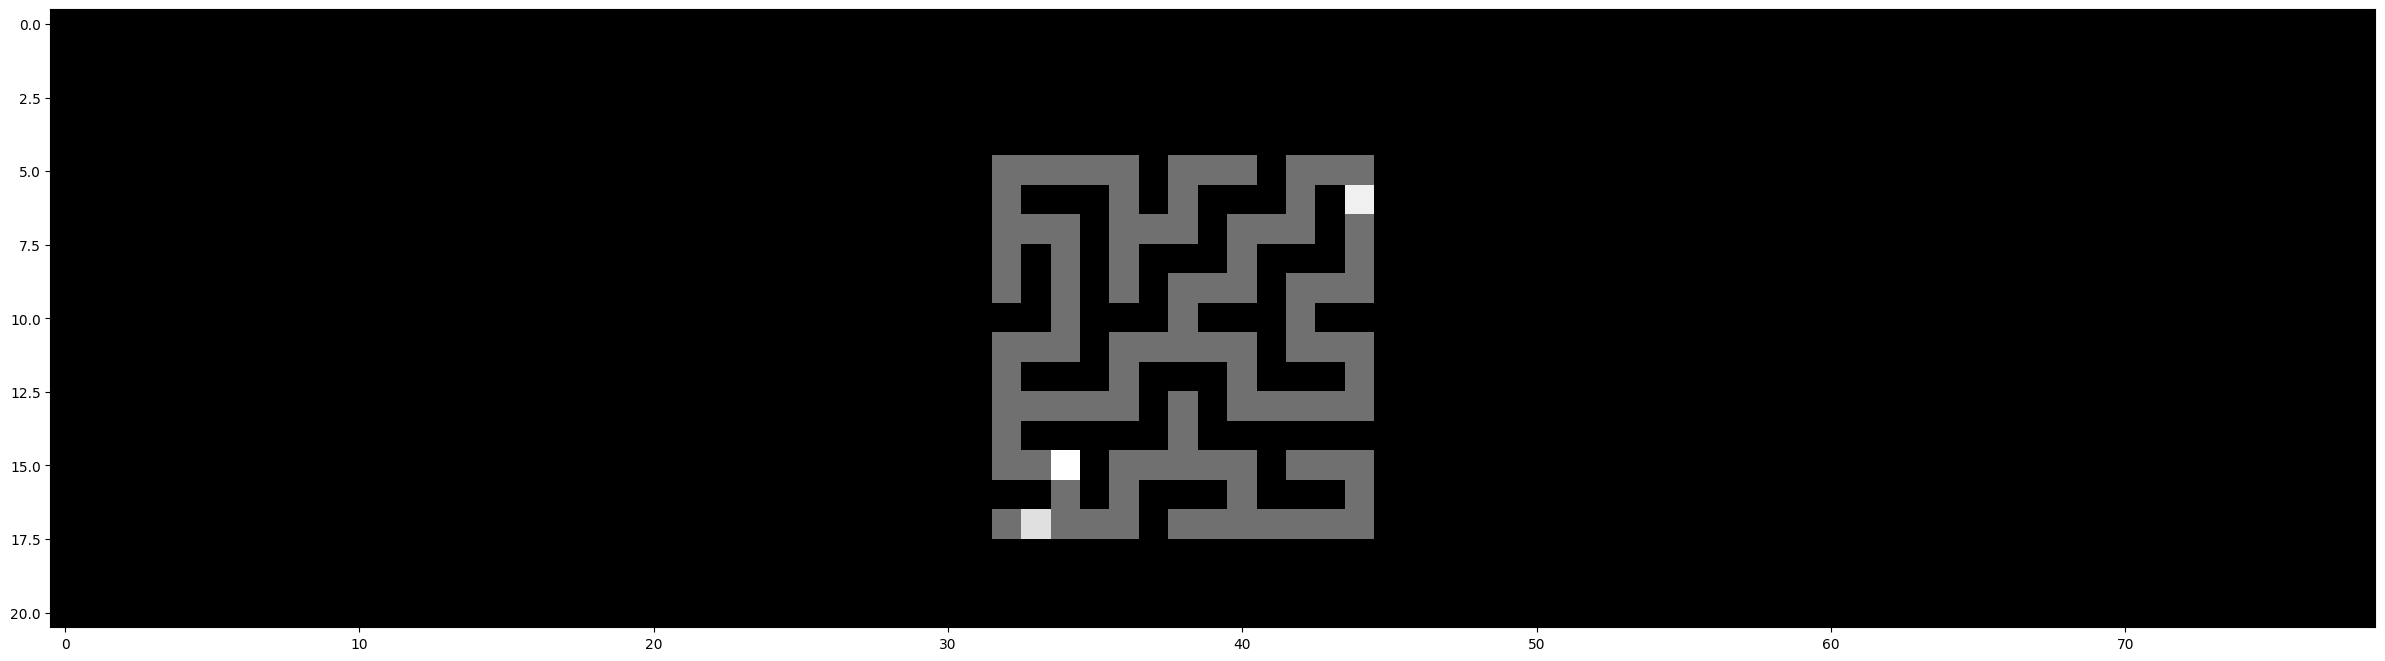

In [14]:
## Apply the rule to the env (env.step) until the goal is reached

print("Goal position:", goal)
visited_position=np.zeros(shape=(15,15), dtype=int)
total_step=0

while agent != goal:
    
    print("Agent position:", agent)
    
    x, y = agent
    
    if visited_position[x][y]==1:
        movement=np.random.randint(0,7)
        while not good_movement((x,y), movement):
            movement = np.random.randint(0, 7)  # mutation
        env.step(movement)
    else:
        movement = best_rule.get_movement(x, y)
        env.step(movement)

    agent = (agent[0] + int_to_coord[movement][0], 
                        agent[1] + int_to_coord[movement][1])
   
    visited_position[x][y]=1
    total_step+=1

    if agent == goal:
        print("Goal reached!")
        break

    env.render()

print(total_step)
